In [1]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.ndimage.filters import gaussian_filter

In [2]:
sz = np.load('sz.npz', allow_pickle=True)

In [3]:
data, names = sz['sz_data'], sz['sz_names']

In [55]:
# cool_name = 'PSZ2 G031.93+78.71'
# cool_name = 'PSZ2 G167.67+17.63'
# cool_name = 'PSZ2 G176.25-52.57'
cool_name = 'PSZ2 G199.09-16.61'

In [56]:
index = names.tolist().index(cool_name)
index

856

In [57]:
name = names[index]

In [61]:
size = 96
mask2 = np.ones((size, size), dtype=np.uint8)
for i in range(size):
    for j in range(size):
        if ((i - size/2)**2 + (j - size/2)**2) < (2/5*size)**2:
            mask2[i, j] = 0

def clip(a):
    a = gaussian_filter(a, sigma=3)
    a[mask2 == 1] = np.mean(a)
    a = a[::-1, ::-1]
    return np.clip(a, np.percentile(a, 5), np.percentile(a, 95))

def show5(item):
    fig, ax = plt.subplots(1, 5, figsize=(15, 5))
    ax[0].imshow(clip(item[0]))
    ax[1].imshow(clip(item[1]))
    ax[2].imshow(clip(item[2]))
    ax[3].imshow(clip(item[3]))
    ax[4].imshow(clip(item[4]))

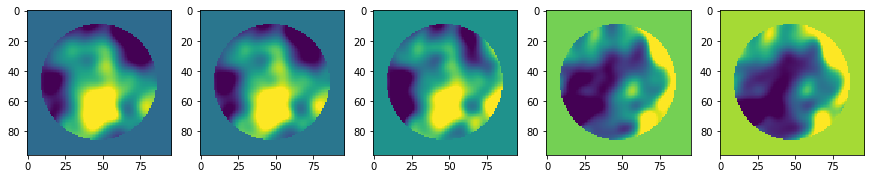

In [62]:
show5(data[index])

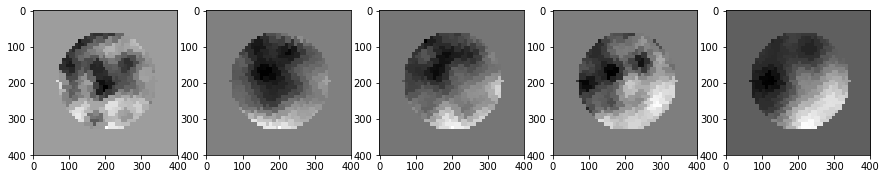

In [63]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
ax[0].imshow(Image.open(f'../data/train/effect/pl100/{name[6:]}_100_gr.gif'))
ax[1].imshow(Image.open(f'../data/train/effect/pl143/{name[6:]}_143_gr.gif'))
ax[2].imshow(Image.open(f'../data/train/effect/pl217/{name[6:]}_217_gr.gif'))
ax[3].imshow(Image.open(f'../data/train/effect/pl353/{name[6:]}_353_gr.gif'))
ax[4].imshow(Image.open(f'../data/train/effect/pl545/{name[6:]}_545_gr.gif'))